# VGG16
- 가중치 초기화
- 데이터셋으로 직접 학습
- 입력 데이터 사이즈 (128,128,3)
- 옵티마이저 adam, 학습률 0.0001로 수정
- train 데이터 배치사이즈 100
- 과적합 방지를 위해 earlystopping 적용

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/안봐도보이조_project

/content/drive/MyDrive/안봐도보이조_project


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model

In [ ]:
# 데이터셋 준비
train_datagen = ImageDataGenerator(rescale=1./255,         # 픽셀 값을 0~1 범위로 변환(scaling)
                                   rotation_range=40,      # 40도까지 회전
                                   width_shift_range=0.2,  # 20%까지 좌우 이동
                                   height_shift_range=0.2, # 20%까지 상하 이동
                                   shear_range=0.2,        # 20%까지 기울임
                                   zoom_range=0.2,         # 20%까지 확대/축소
                                   horizontal_flip=True)   # 좌우 뒤집기
    
train_generator = train_datagen.flow_from_directory('./train_10', # 데이터가 존재하는 디렉토리
                                                    batch_size=100, # 배치사이즈(변경가능)
                                                    class_mode='categorical', # 다중 분류이므로 categorical
                                                    target_size=(128, 128)) # 모델에 입력해줄 데이터 사이즈(변경가능)

valid_datagen = ImageDataGenerator(rescale=1./255) # 스케일링만 진행
valid_generator = valid_datagen.flow_from_directory('./valid_10',
                                                    batch_size=20,      
                                                    class_mode='categorical', 
                                                    target_size=(128, 128))

test_datagen = ImageDataGenerator(rescale=1./255) # 스케일링만 진행
test_generator = test_datagen.flow_from_directory('./test_10',
                                                  batch_size=10,      
                                                  class_mode='categorical', 
                                                  target_size=(128, 128),shuffle=False)

Found 10529 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [ ]:
# 클래스 확인
print(train_generator.class_indices)

{'갈아만든배': 0, '레쓰비': 1, '마운틴듀': 2, '밀키스': 3, '스프라이트': 4, '칠성사이다': 5, '코카콜라': 6, '트로피카나망고': 7, '펩시콜라': 8, '환타오렌지': 9}


In [ ]:
# 모델 구성 및 확인
model = VGG16(weights=None, classes=10, input_shape=(128,128,3))
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
# 모델 컴파일
model.compile(optimizer = Adam(0.0001), # 최적화함수 adam사용
              loss = 'categorical_crossentropy', # 손실함수 범주형 교차엔트로피 사용
              metrics = ['accuracy']) # 지표는 정확도
              # 학습률을 default로 사용했을 때 아무리 학습을 진행 시켜도 정확도가 0.1에서 개선되지 않음 > 학습률을 더 낮춤 > 제대로 학습됨!

In [ ]:
# 모델 학습
earlystopping = EarlyStopping(monitor='val_loss', patience=10) # 10번동안 성능개선이 없으면 학습 조기종료

history = model.fit(train_generator,
                    steps_per_epoch=100,  
                    epochs=150, 
                    validation_data=valid_generator, 
                    validation_steps=30, callbacks=[earlystopping]) 

Epoch 1/150
100/100 [==============================] - 106s 1s/step - loss: 1.7695 - accuracy: 0.2535 - val_loss: 1.2098 - val_accuracy: 0.4550
Epoch 2/150
100/100 [==============================] - 99s 981ms/step - loss: 1.0122 - accuracy: 0.5222 - val_loss: 0.7614 - val_accuracy: 0.5967
Epoch 3/150
100/100 [==============================] - 99s 986ms/step - loss: 0.6226 - accuracy: 0.7119 - val_loss: 0.7445 - val_accuracy: 0.5933
Epoch 4/150
100/100 [==============================] - 99s 984ms/step - loss: 0.5237 - accuracy: 0.7566 - val_loss: 0.3688 - val_accuracy: 0.8767
Epoch 5/150
100/100 [==============================] - 100s 991ms/step - loss: 0.5554 - accuracy: 0.7629 - val_loss: 0.2539 - val_accuracy: 0.9000
Epoch 6/150
100/100 [==============================] - 99s 982ms/step - loss: 0.2214 - accuracy: 0.9148 - val_loss: 0.1316 - val_accuracy: 0.9517
Epoch 7/150
100/100 [==============================] - 98s 977ms/step - loss: 0.2387 - accuracy: 0.9085 - val_loss: 0.1673 - 

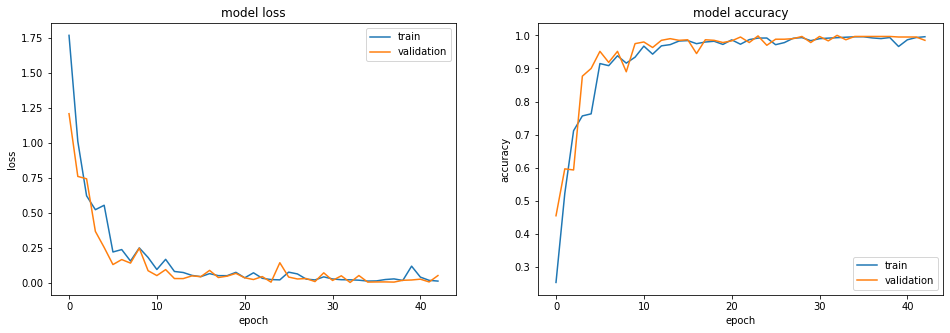

In [ ]:
# 모델 학습 과정 시각화
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc=0)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc=0)

In [ ]:
# 모델 저장
model.save('./송종호/VGG16_2.h5')

In [ ]:
# 모델 평가
model.evaluate(test_generator)

50/50 [==============================] - 97s 2s/step - loss: 0.0680 - accuracy: 0.9760


[0.06797613948583603, 0.9760000109672546]

In [ ]:
model = load_model('./송종호/VGG16_2.h5')

In [ ]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


Text(0.5, 1.0, '0.96확률로 레쓰비입니다')

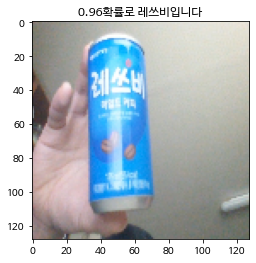

In [ ]:
# 직접 찍은 음료 이미지로 예측 결과 확인

class_dict = {0:'갈아만든배', 1:'레쓰비', 2:'마운틴듀', 3:'밀키스', 4:'스프라이트', 5:'칠성사이다', 6:'코카콜라', 7:'트로피카나망고', 8:'펩시콜라', 9:'환타오렌지'}

test_img = cv2.imread('./123.jpg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_img = cv2.resize(test_img,(128,128))/255.0
test_img_input = test_img.reshape((1,)+test_img.shape)
pred = model.predict(test_img_input)
pred_class = class_dict[np.argmax(pred, axis=1)[0]]
plt.imshow(test_img)
# print(f'{pred.max():.2f}확률로 {pred_class}입니다')
plt.title(f'{pred.max():.2f}확률로 '+pred_class+'입니다')

In [ ]:
Y_pred = model.predict(test_generator)
classes = test_generator.classes[test_generator.index_array]
y_pred = np.argmax(Y_pred, axis=1) 

# class_names = ['갈아만든배', '레쓰비', '마운틴듀', '밀키스', '스프라이트', '칠성사이다', '코카콜라', '트로피카나망고', '펩시콜라', '환타오렌지'] 
result_dict = dict(map(reversed, test_generator.class_indices.items()))
class_names = list(result_dict.values())

print('-- Confusion Matrix --')
print(confusion_matrix(classes, y_pred))

print('-- Classification Report --')
print(classification_report(classes, y_pred, target_names=class_names))


-- Confusion Matrix --
[[50  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  2  0]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0 10 40  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 50  0  0  0  0]
 [ 0  0  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 0  0  0  0  0  0  0  0 50  0]
 [ 0  0  0  0  0  0  0  0  0 50]]
-- Classification Report --
                 precision    recall  f1-score   support

  갈아만든배       1.00      1.00      1.00        50
         레쓰비       1.00      0.96      0.98        50
     마운틴듀       0.83      1.00      0.91        50
        밀키스       1.00      0.80      0.89        50
     스프라이트       1.00      1.00      1.00        50
   칠성사이다       1.00      1.00      1.00        50
      코카콜라       1.00      1.00      1.00        50
트로피카나망고       1.00      1.00      1.00        50
     펩시콜라       0.96      1.00      0.98        50
   환타오렌지       1.00      1.00      1.00 

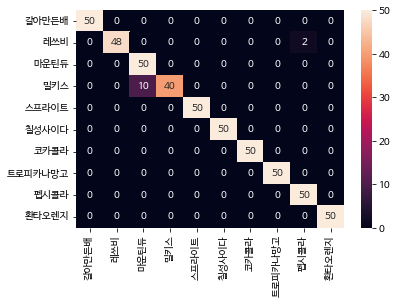

In [ ]:
sns.heatmap(confusion_matrix(classes, y_pred), annot=True, fmt='d',
            xticklabels=['갈아만든배', '레쓰비', '마운틴듀', '밀키스', '스프라이트', '칠성사이다', '코카콜라', '트로피카나망고', '펩시콜라', '환타오렌지'] ,
            yticklabels=['갈아만든배', '레쓰비', '마운틴듀', '밀키스', '스프라이트', '칠성사이다', '코카콜라', '트로피카나망고', '펩시콜라', '환타오렌지'] )